In [136]:
#libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;
import numpy as np
import csv as csv
import seaborn as sns
%matplotlib inline

from scipy import stats

from pandas import ExcelWriter
from pandas import ExcelFile
 
from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS

#pandas cheat sheet
#https://www.dataquest.io/blog/pandas-cheat-sheet/

In [137]:
#load in pop docs and tagged file

df1 = pd.read_excel('C:/Users/e5553468/Desktop/Python/knugget_data_pop_docs.xlsx', sheet_name='Sheet 1')
#df2 = pd.read_excel('C:/Users/e5553468/Desktop/Python/knugget_tags_friday.xlsx', sheet_name='pop docs') 



print("Column headings:")
print(df1.columns)
print("Data Sheet Dimensions:")
print(df1.shape)

#print("Column headings:")
#print(df2.columns)
#print("Data Sheet Dimensions:")
#print(df2.shape)


Column headings:
Index(['Creation Date', 'Download Restricted', 'Extension', 'Hyperlinks',
       'Number Likes', 'Number Views', 'Owner Name', 'Project Code', 'Tags',
       'COUNTRY', 'LOB', 'TOPIC', 'REGULATION', 'CLIENT', 'VENDOR', 'Title',
       'Type', 'Uploader Name', 'Whitelabel'],
      dtype='object')
Data Sheet Dimensions:
(334, 19)


In [118]:
pop_docs = df1.sort_values('Number Views', ascending=False)

# top 15 only
#  pop_docs = df4.sort_values('Number Views', ascending=False)[:15]

pop_docs.shape

(334, 19)

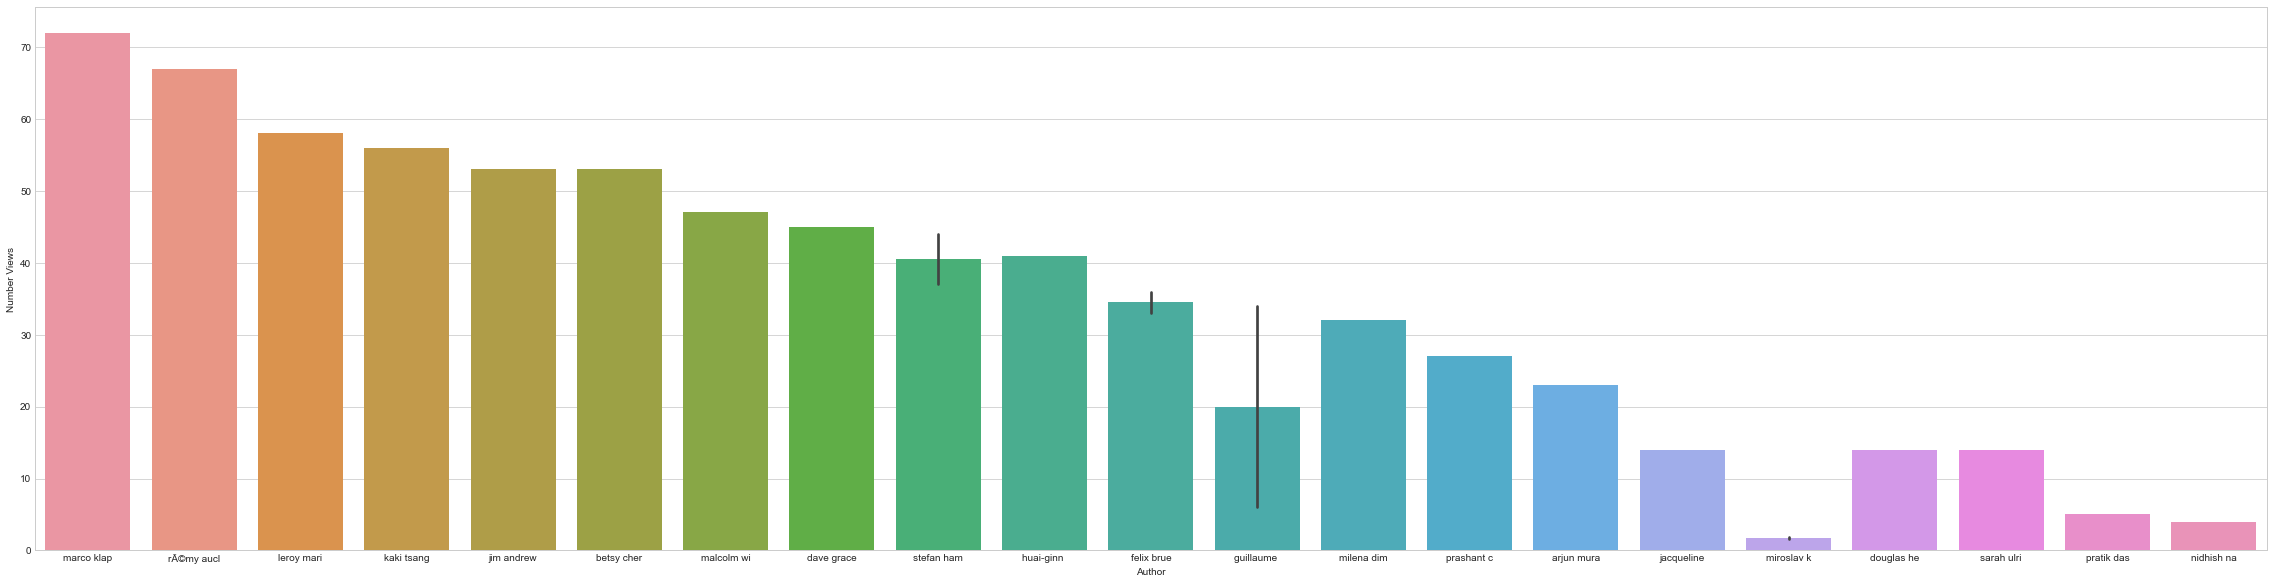

In [119]:
pop_docs['Author'] = pop_docs['Owner Name'].apply(lambda x: x[:10])
sns.set_style("whitegrid")
plt.figure(figsize=(40,10))
sns.barplot(x='Author', y='Number Views', data=pop_docs)

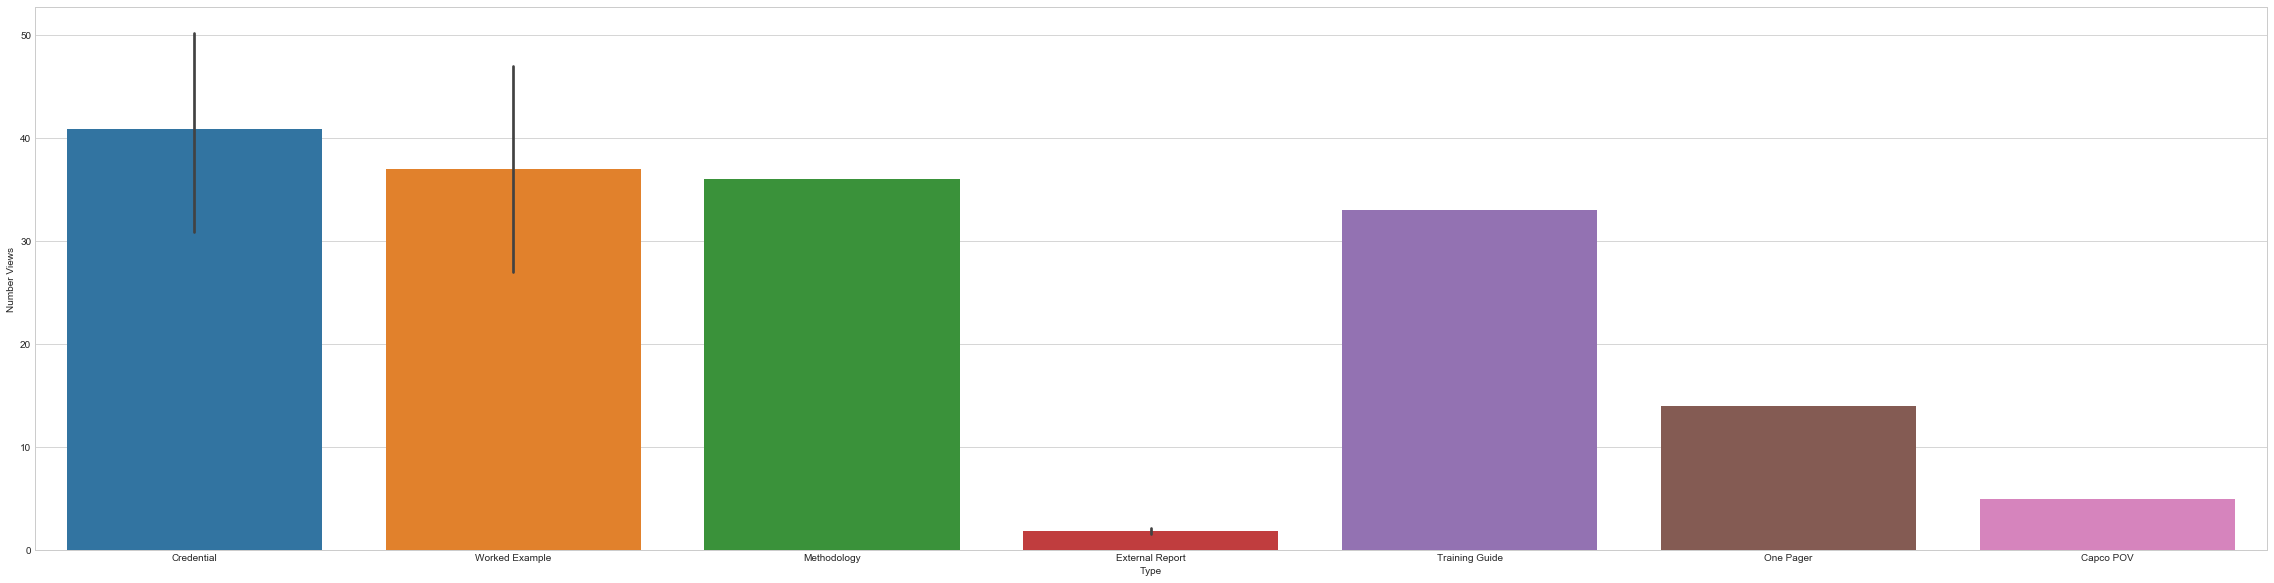

In [120]:
pop_docs['Type'] = pop_docs['Type'].apply(lambda x: x[:20])
sns.set_style("whitegrid")
plt.figure(figsize=(40,10))
sns.barplot(x='Type', y='Number Views', data=pop_docs)

In [121]:
# search for specific documents by keyword.

pop_docs[['Title','Owner Name','Number Views','Creation Date']][pop_docs.Title.str.contains('governance')].sort_values('Number Views',ascending=False)

,Title,Owner Name,Number Views,Creation Date
55,Enhance your data governance to meet new priva...,miroslav koller,3,2017-05-22
282,"The governance, risk and compliance playbook 1...",miroslav koller,1,2018-04-11


In [122]:
pop_docs[['Title','Owner Name','Number Views','Creation Date']][pop_docs.Title.str.contains('data management')].sort_values('Number Views',ascending=False)

,Title,Owner Name,Number Views,Creation Date
5,Optimizing data management in the wealth indus...,miroslav koller,9,2017-01-19
12,Stretch your data management capabilities Forr...,miroslav koller,2,2017-01-24
14,Want to drive actionable Insights question Ref...,miroslav koller,2,2017-01-25
9,Is your data management ready for systems of i...,miroslav koller,1,2017-01-23


In [130]:
df2 = df1[['Title','Tags']]
df2.head(5)

df2.dtypes

df3 = df2.to_json()

df3

a = pd.DataFrame(df2.Tags.str.split(',').tolist(), index=df2.Title).stack()
a = a.reset_index()[[0, 'Title']] # var1 variable is currently labeled 0
a.columns = ['Title', 'Tags'] # renaming var1
a.head(5)

,Title,Tags
0,Technology,The cloud comes of age in capital markets_All ...
1,Security,The cloud comes of age in capital markets_All ...
2,Infrastructure,The cloud comes of age in capital markets_All ...
3,FX,The cloud comes of age in capital markets_All ...
4,USA,The cloud comes of age in capital markets_All ...


In [133]:
a.describe

<bound method NDFrame.describe of                                    Title  \
0                             Technology   
1                               Security   
2                         Infrastructure   
3                                     FX   
4                                    USA   
5                            Market Data   
6                              Utilities   
7                              Singapore   
8                                  MiFID   
9                             Securities   
10                            Operations   
11                              Research   
12                                   FCA   
13                          Requirements   
14                                France   
15                               Digital   
16                              Security   
17                              Big Data   
18                          Accelerators   
19                                 Fraud   
20                                  Risk  

,Title,Tags
0,T,i
1,T,a


In [135]:
# export expanded split dataframe to excel - to be concatenated with the pop_docs 

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('knugget_analysis.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
a.to_excel(writer, index=False, sheet_name='tagsplitfinal')
#tagsplit.to_excel(writer, sheet_name='tagsplit')
pop_docs.to_excel(writer, sheet_name='pop docs')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
# export expanded split dataframe to excel - to be concatenated with the pop_docs 

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('knugget_tags.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
#df6.to_excel(writer, sheet_name='tags')
#df5.to_excel(writer, sheet_name='pop docs')
#df3.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

'{"Title":{"0":"The cloud comes of age in capital markets_All clear for more cloud Celent Dec16","1":"Perspective_Which innovation accelerators make sense in banking question IDC Jun16","2":"Canvas Credential - Programme Management Data Visualisation","3":"Data sensitivity further complicates PSD2 Euromoney Dec16","4":"Fuel retail transformation with payments data Forrester Nov16","5":"Optimizing data management in the wealth industry CEB Nov16","6":"Breakout vendors_Big data integration for business process automation Forrester Aug16","7":"Client Data Management and KYC Programme","8":"Create a road map for a real-time agile self-service data platform Forrester Dec16","9":"Is your data management ready for systems of insight question Forrester Jul15","10":"Lost in data translation question Forresters data taxonomy to the rescue Forrester Apr16","11":"The Forrester wave_Enterprise insight platform suites Q4 2016 Forrester Dec16","12":"Stretch your data management capabilities Forrester

,Title,Tags
0,Technology,The cloud comes of age in capital markets_All ...
1,Security,The cloud comes of age in capital markets_All ...
2,Infrastructure,The cloud comes of age in capital markets_All ...
3,FX,The cloud comes of age in capital markets_All ...
4,USA,The cloud comes of age in capital markets_All ...
5,Market Data,The cloud comes of age in capital markets_All ...
6,Utilities,The cloud comes of age in capital markets_All ...
7,Singapore,The cloud comes of age in capital markets_All ...
8,MiFID,The cloud comes of age in capital markets_All ...
9,Securities,The cloud comes of age in capital markets_All ...
